In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Prepare dataset

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris = iris[iris['species'].isin(['setosa', 'virginica'])]

In [4]:
X = iris.iloc[:,0:4].to_numpy().T

In [5]:
y = (iris['species'] == 'setosa').to_numpy().astype(int)

In [6]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
iris['species'].value_counts()

species
setosa       50
virginica    50
Name: count, dtype: int64

In [8]:
X[:,:3]

array([[5.1, 4.9, 4.7],
       [3.5, 3. , 3.2],
       [1.4, 1.4, 1.3],
       [0.2, 0.2, 0.2]])

In [9]:
y[:3]

array([1, 1, 1])

## functions

In [10]:
def sigmoid(x):
    """Vectorized sigmoid function"""
    return 1 / (1 + np.exp(-x))

In [11]:
sigmoid(np.array([-2, 0, 1]))

array([0.11920292, 0.5       , 0.73105858])

## Logistic regression with gradient descent

### Initial parameters

In [12]:
w = np.zeros((X.shape[0], 1))
b = np.zeros(1)

In [13]:
w

array([[0.],
       [0.],
       [0.],
       [0.]])

In [14]:
b

array([0.])

### learning with fix rate

In [15]:
epochs = 1000
alpha = 0.001

In [16]:
costs = []
for i in range(epochs):
    # foward propargation
    z = w.T @ X + b
    a = sigmoid(z)
    
    # cost function
    J = -(np.dot(y, np.log(a.squeeze())) + np.dot(1-y, np.log(1-a.squeeze()))) / X.shape[1]
    
    # back propargation
    dz = a - y.reshape(1, -1)
    dw = X @ dz.T / X.shape[1]
    db = np.sum(dz) / X.shape[1]

    # update parameter
    w -= alpha * dw
    b -= alpha * db

    # record costs after at epoch
    # print(w.T, b, J)
    costs.append(J)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Cost')]

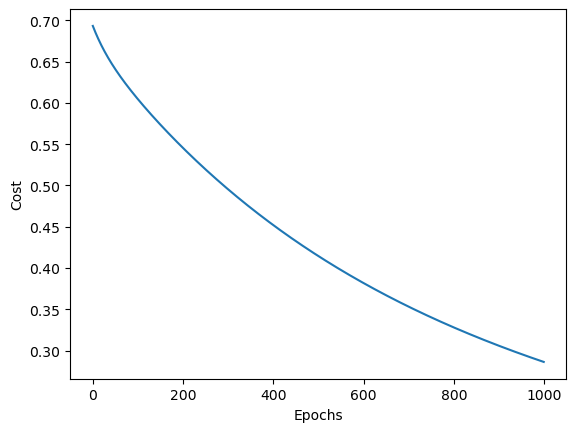

In [17]:
ax = sns.lineplot(costs)
ax.set(xlabel='Epochs', ylabel='Cost')

### Using variable learning rate (begin with large steps)

In [18]:
w = np.zeros((X.shape[0], 1))
b = np.zeros(1)
epochs = 1000

def f_alpha(n):
    if n < 20:
        return 0.1
    elif n < 200:
        return 0.01
    else:
        return 0.001

In [19]:
costs = []
for i in range(epochs):
    # foward propargation
    z = w.T @ X + b
    a = sigmoid(z)
    
    # cost function
    J = -(np.dot(y, np.log(a.squeeze())) + np.dot(1-y, np.log(1-a.squeeze()))) / X.shape[1]
    
    # back propargation
    dz = a - y.reshape(1, -1)
    dw = X @ dz.T / X.shape[1]
    db = np.sum(dz) / X.shape[1]

    # update parameter
    w -= f_alpha(i) * dw
    b -= f_alpha(i) * db

    # record costs after at epoch
    # print(w.T, b, J)
    costs.append(J)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Cost')]

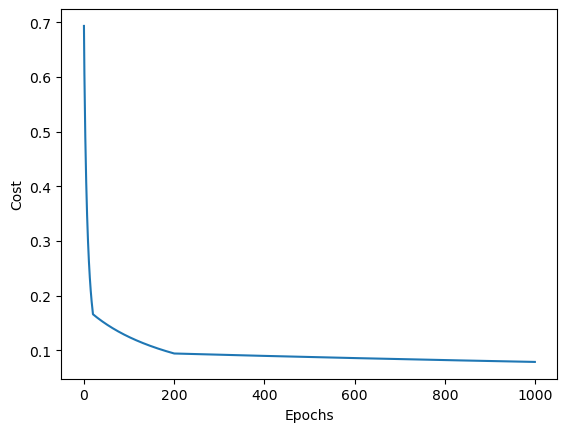

In [20]:
ax = sns.lineplot(costs)
ax.set(xlabel='Epochs', ylabel='Cost')

In [21]:
J, w, b

(np.float64(0.07864800441525553),
 array([[ 0.30526572],
        [ 0.6917984 ],
        [-1.07575652],
        [-0.53901738]]),
 array([0.163436]))

### plot predictions

In [22]:
y_pred = sigmoid(w.T @ X + b)
y_pred

array([[0.92606259, 0.89290564, 0.90934412, 0.87982723, 0.92866601,
        0.92168697, 0.90482364, 0.91055585, 0.86977354, 0.89437939,
        0.93401633, 0.89583799, 0.89512045, 0.91004953, 0.96451309,
        0.95763409, 0.94763814, 0.92228609, 0.92702024, 0.92915526,
        0.90268283, 0.92061288, 0.94657506, 0.87044861, 0.8616527 ,
        0.87392812, 0.89139418, 0.92061072, 0.923372  , 0.87899271,
        0.87482078, 0.91171391, 0.94880953, 0.95827715, 0.88917826,
        0.9244782 , 0.94033019, 0.93019908, 0.88852014, 0.9130111 ,
        0.92763196, 0.82750963, 0.90150618, 0.88759809, 0.88988635,
        0.88456029, 0.92553972, 0.89729746, 0.93210988, 0.91363406,
        0.03129391, 0.06246437, 0.04424826, 0.05207243, 0.03908423,
        0.02476906, 0.08560649, 0.03391461, 0.03656524, 0.04488042,
        0.09948365, 0.06061686, 0.06099899, 0.05604779, 0.05171107,
        0.06847476, 0.06514147, 0.03730566, 0.01274484, 0.06474747,
        0.05274857, 0.07314983, 0.02115316, 0.09

In [23]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

[Text(0.5, 0, 'Observed y'), Text(0, 0.5, 'Predicted y')]

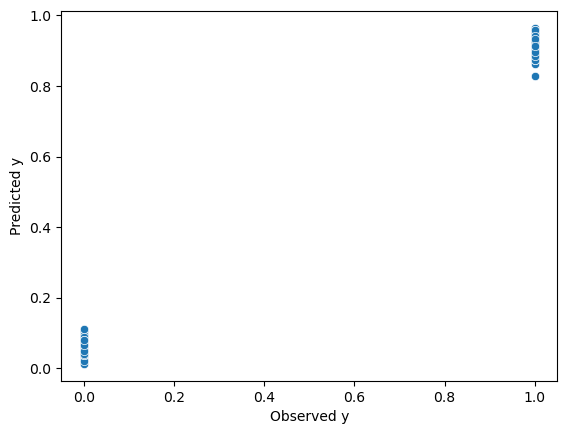

In [24]:
ax = sns.scatterplot(x=y, y=y_pred[0])
ax.set(xlabel='Observed y', ylabel='Predicted y')